In [1]:
# imports qiskit library with aer simulator, visualizations, and quantum circuits
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit import transpile
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit import IBMQ
import ibmqID

ibmq_qasm_simulator
Number of qubits: 32
Number of pending jobs: 1

ibmq_lima
Number of qubits: 5
Number of pending jobs: 419

ibmq_belem
Number of qubits: 5
Number of pending jobs: 26

ibmq_quito
Number of qubits: 5
Number of pending jobs: 36

simulator_statevector
Number of qubits: 32
Number of pending jobs: 1

simulator_mps
Number of qubits: 100
Number of pending jobs: 1

simulator_extended_stabilizer
Number of qubits: 63
Number of pending jobs: 1

simulator_stabilizer
Number of qubits: 5000
Number of pending jobs: 1

ibmq_manila
Number of qubits: 5
Number of pending jobs: 196

ibm_nairobi
Number of qubits: 7
Number of pending jobs: 518

ibm_oslo
Number of qubits: 7
Number of pending jobs: 14



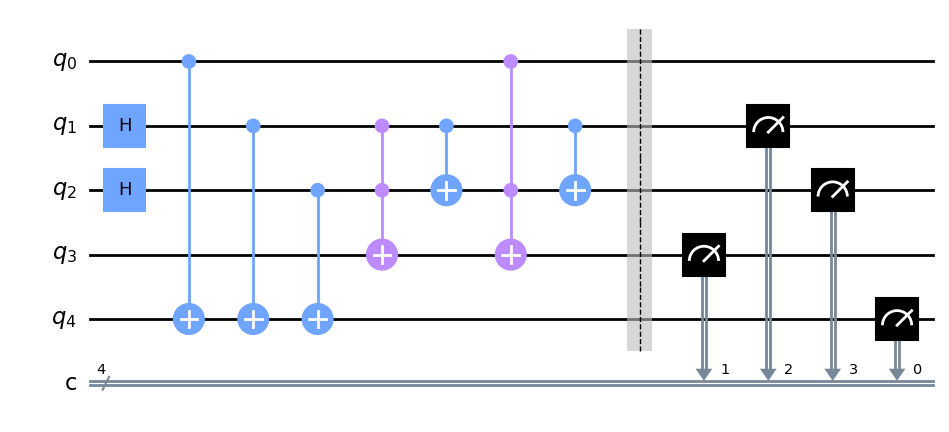

In [2]:
# accesses IBM account ID, laods account and returns the provider object which accesses all of the backends
IBMQ.save_account(ibmqID.token, overwrite=True)
provider = IBMQ.load_account()
myprovider = IBMQ.get_provider()

# prints the information for every backend in the provider (name, number of qubits, and number of pending jobs)
for b in myprovider.backends():
    print(b)
    print("Number of qubits: " + str(b.configuration().n_qubits))
    print ("Number of pending jobs: " + str(b.status().pending_jobs))
    print()
    
# implementation of a ripple carry adder with a variable number of full adders

a = 1

circ = QuantumCircuit(1 + 4*a, 2*a + a + 1)
for x in range(a):
    circ.h(1 + 3*x)
    circ.h(2 + 3*x)
    circ.cx(0 + 3*x, 3*a + x + 1)
    circ.cx(1 + 3*x, 3*a + x + 1)
    circ.cx(2 + 3*x, 3*a + x + 1)
    circ.ccx(1 + 3*x, 2 + 3*x, 3 + 3*x)
    circ.cx(1 + 3*x, 2 + 3*x)
    circ.ccx(0 + 3*x, 2 + 3*x , 3 + 3*x)
    circ.cx(1 + 3*x, 2 + 3*x)

circ.barrier(range(1 + 4*a))

circ.measure(3*a, a)
for x in range(a):
    circ.measure(3*x + 1, a + x + 1)
    circ.measure(3*x + 2, 2*a + x + 1)
    
    circ.measure(3*a + x + 1, x)



circ.draw('mpl')

In [8]:
# aquires the specified backend, transpiles 'circ' for the toppology of the specified backend
# creates a job and adds it to that queue to be ran 100 times
backend = myprovider.get_backend('ibmq_qasm_simulator')
instructions = transpile(circ, backend)
simulation = backend.run(instructions, shots=100)

In [9]:
# can be ran intermitently to obtain the progress of the job in the queue
print(simulation.queue_info())

None


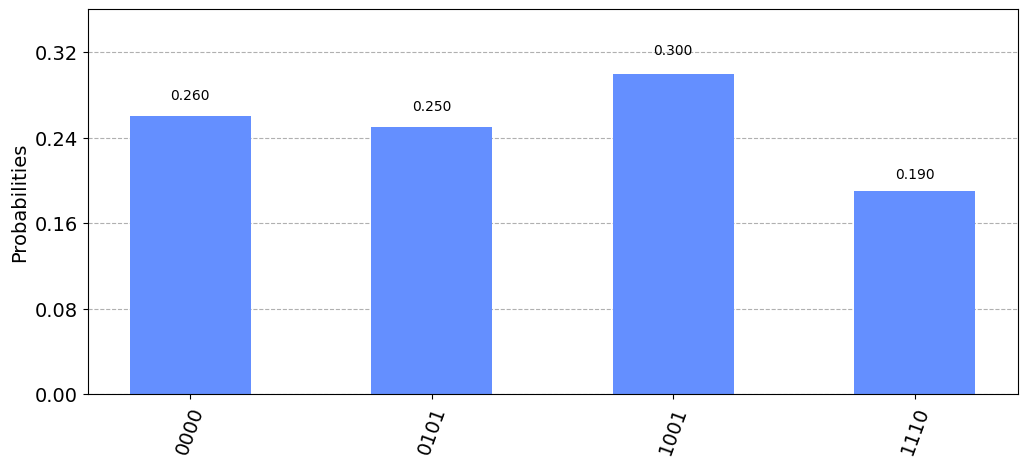

In [11]:
# obtains the results of the 100 runs and plots the histogram of all of the output configurations
results = simulation.result()
counts = results.get_counts(instructions)
plot_histogram(counts, figsize = (12,5))